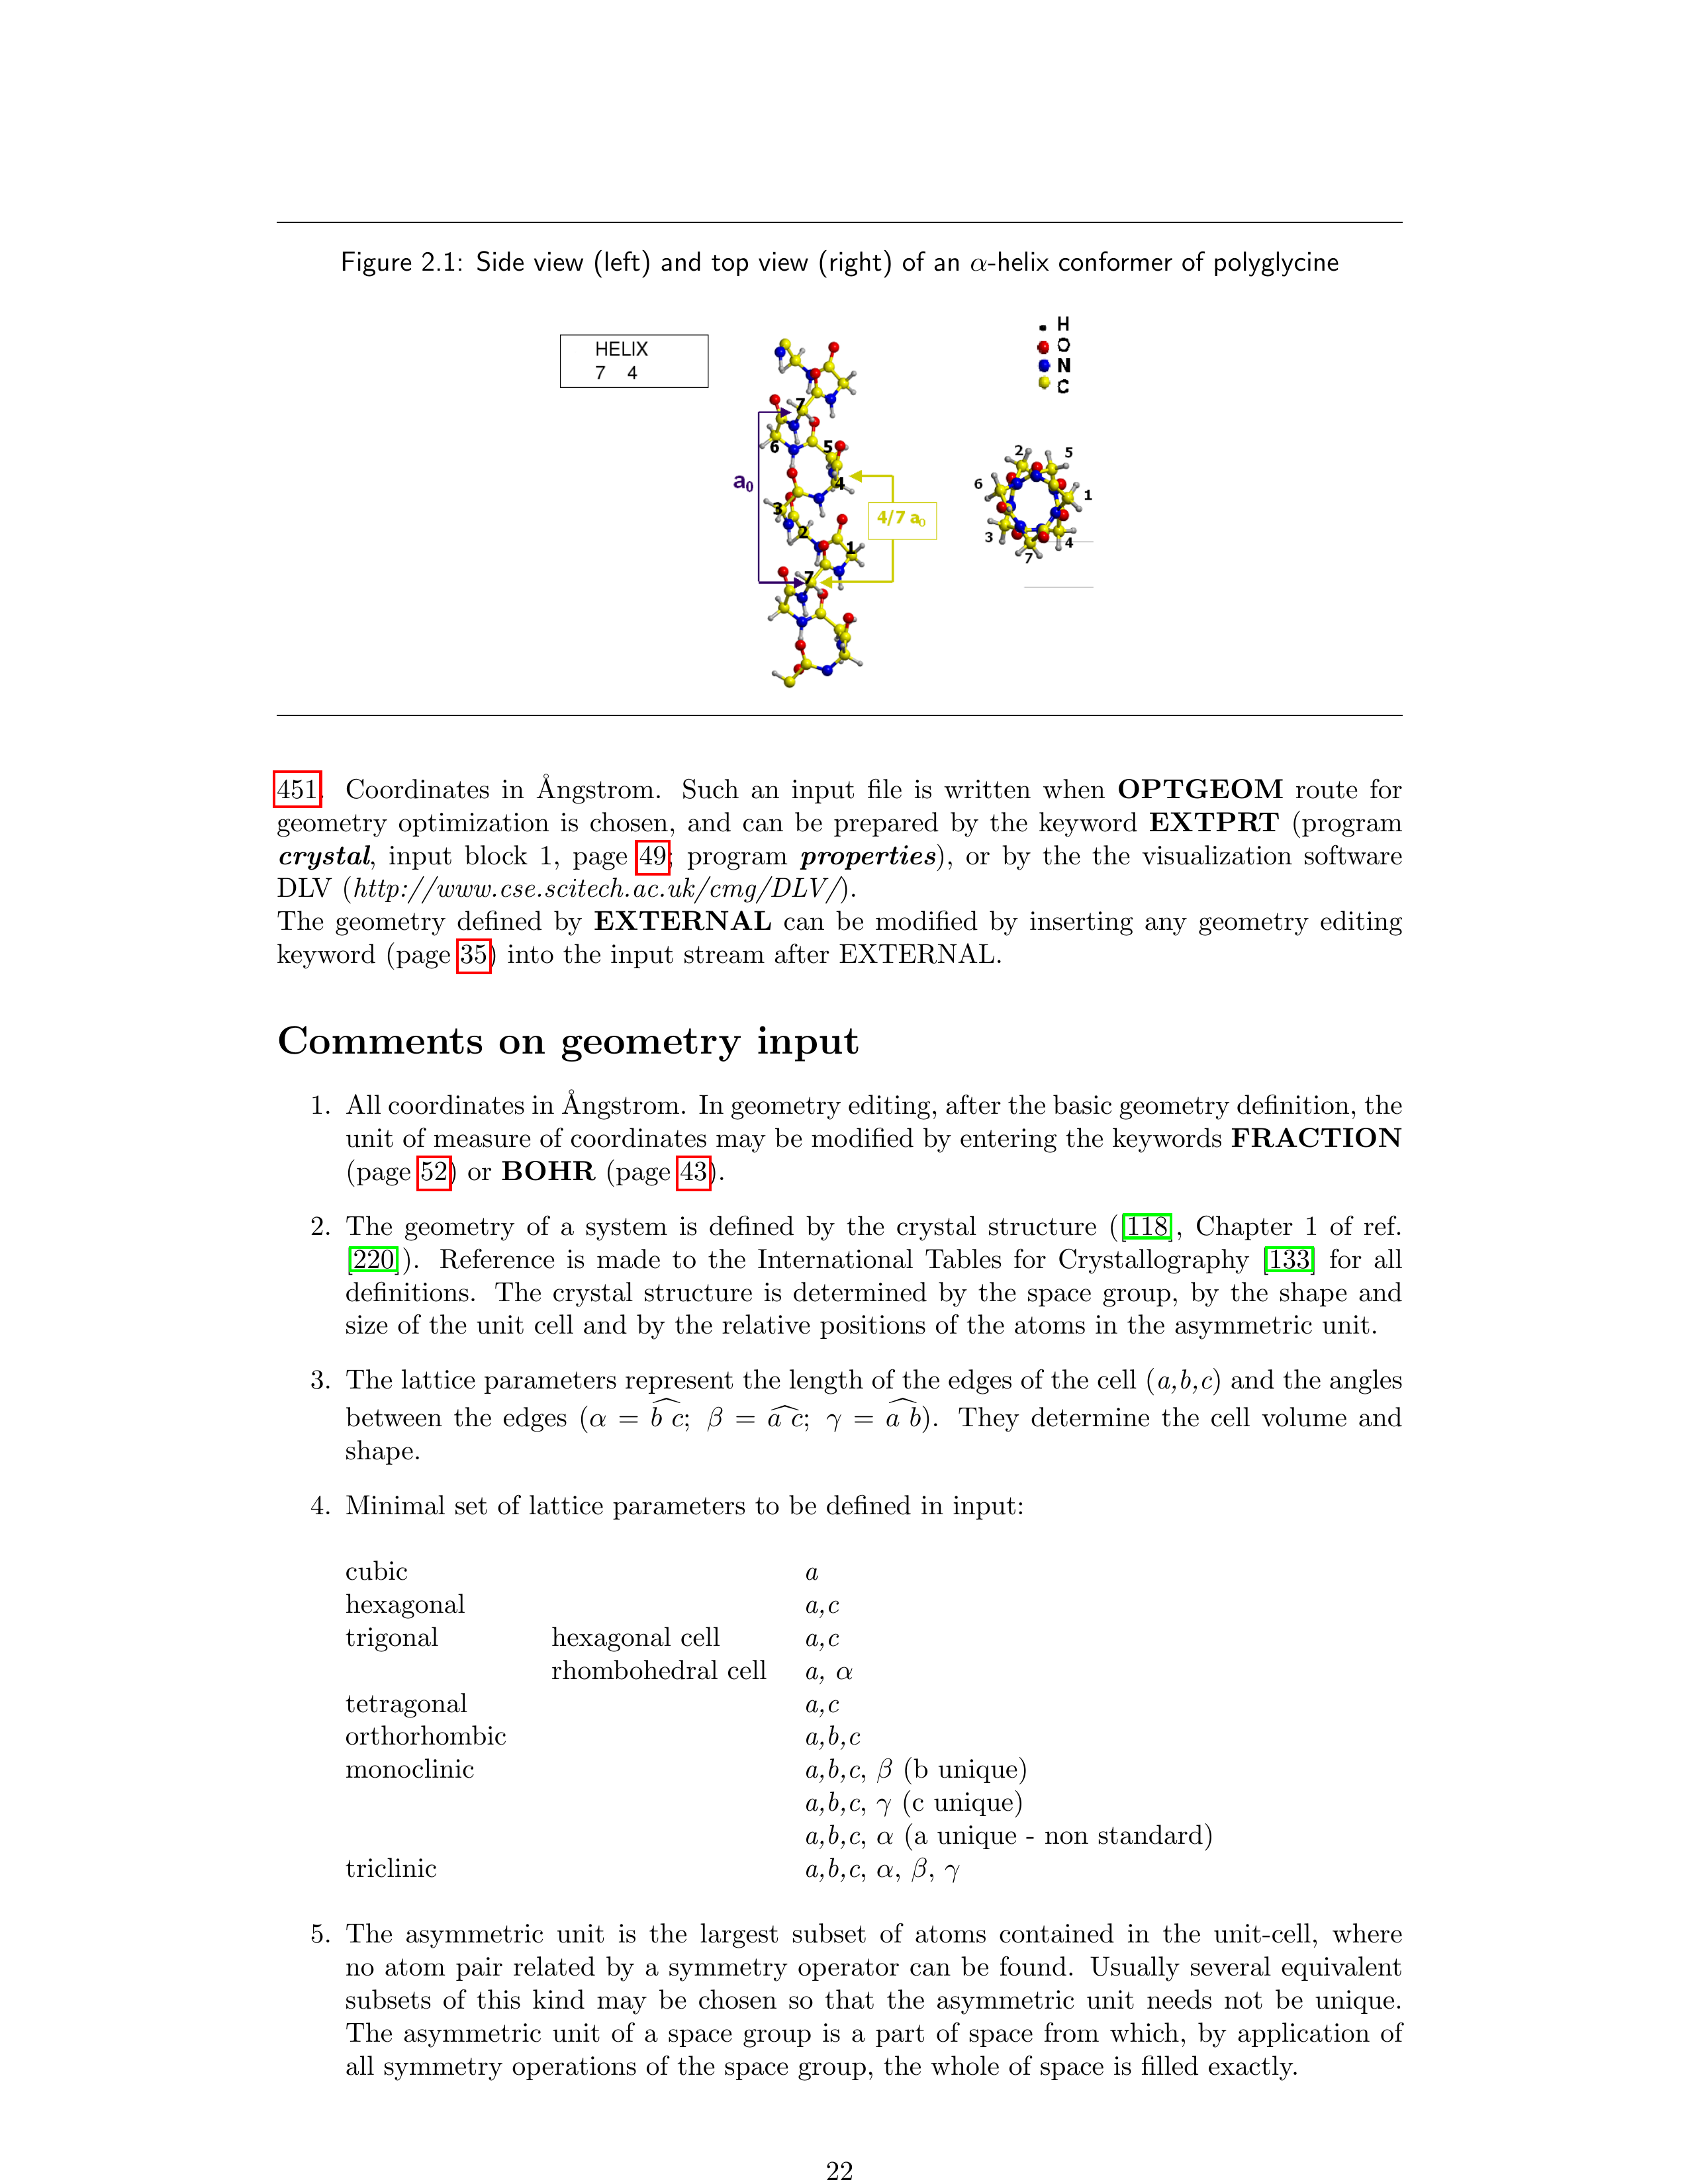

In [1]:
#conda install -c conda-forge poppler
import pdf2image 

doc_img = pdf2image.convert_from_path("crystal23.pdf", dpi=300)

# print one page as example
doc_img[21]

In [2]:
import pytesseract 
import tqdm

doc_txt = []
for page in tqdm.tqdm(doc_img):
    text = pytesseract.image_to_string(page)
    doc_txt.append(text)

doc_txt[21]

100%|██████████| 524/524 [17:20<00:00,  1.99s/it]


'Figure 2.1: Side view (left) and top view (right) of an a-helix conformer of polyglycine\n\nHELIX\n74\n\noOZ2ZoLr\n\nCoordinates in Angstrom. Such an input file is written when OPTGEOM route for\ngeometry optimization is chosen, and can be prepared by the keyword EXTPRT (program\ncrystal, input block 1, page [49} program properties), or by the the visualization software\nDLV (http://www.cse.scitech.ac.uk/cmg/DLV/).\n\nThe geometry defined by EXTERNAL can be modified by inserting any geometry editing\nkeyword (page [35) into the input stream after EXTERNAL.\n\nComments on geometry input\n\n1.\n\nAll coordinates in Angstrom. In geometry editing, after the basic geometry definition, the\nunit of measure of coordinates may be modified by entering the keywords FRACTION\n\n(page [52) or BOHR (page [43).\n\n. The geometry of a system is defined by the crystal structure ({118], Chapter 1 of ref.\n\n220]). Reference is made to the International Tables for Crystallography [133] for all\ndefinit

In [3]:
# Using the Table of Contents to tag the chapters
title_map = {
    "9-18": "Introductory Remarks",
    "19-34": "Wave Function Calculation: Basic Input Route",
    "35-132": "Wave Function Calculation: Advanced Input Route",
    "133-148": "Density Functional Methods",
    "149-164": "Semi-classical corrections for HF and DFT and composite methods (3c and sol-3c)",
    "165-186": "Spin-Orbit Coupling, Non-Collinear Magnetism, Two-Component Spinors",
    "187-211": "Geometry Optimization",
    "212-248": "Lattice Dynamics - Vibration Frequencies",
    "249-268": "Harmonic And Quasi-Harmonic Thermodynamics",
    "269-275": "Dielectric Properties up to Fourth Order via the Coupled Perturbed HF/KS Method",
    "276-281": "Tools for Studying Solid Solutions",
    "282-287": "Equations of State",
    "288-303": "Calculation of Elastic, Piezoelectric and Photoelastic Tensors",
    "304-367": "One-electron Properties and Wave-function Analysis",
    "368-372": "Running Crystal in Parallel",
    "373-393": "Input Examples",
    "394-399": "Basis Set",
    "400-417": "Theoretical Framework",
    "418-426": "Symmetry Groups",
    "427-439": "Summary of Inpput Keywords",
    "440-443": "Printing Options",
    "444-456": "External Format",
    "457-465": "Normalization Coefficients",
    "466-468": "CRYSTAL09 vs CRYSTAL06",
    "469-472": "CRYSTAL14 vs CRYSTAL09",
    "473-476": "CRYSTAL17 vs CRYSTAL14",
    "477-479": "CRYSTAL23 vs CRYSTAL17",
    "480-481": "Acronyms",
    "482-504": "Bibliography",
    "505-524": "Index"
    ""
}

lst_docs, lst_ids, lst_metadata = [], [], []
for n,page in tqdm.tqdm(enumerate(doc_txt)):
    try:
        ## get title
        title = [v for k,v in title_map.items() 
                 if n in range(int(k.split("-")[0]), 
                               int(k.split("-")[1])+1)][0]
        ## clean page
        page = page.replace("Table of Contents","")
        ## get chapter
        for i,p in enumerate(page.split('\n\n')):
            # if len(p.strip())>5:  ##<--clean paragraph
            lst_docs.append(p.strip())
            lst_ids.append(str(n)+"_"+str(i))
            lst_metadata.append({"title":title})
    except:
        continue

524it [00:00, 26351.44it/s]


In [7]:
import chromadb 

embedder = chromadb.utils.embedding_functions.SentenceTransformerEmbeddingFunction(model_name="all-mpnet-base-v2")

db = chromadb.PersistentClient('data/')
# db  = chromadb.EphemeralClient()

collection_name = "crystal23"
collection = db.get_or_create_collection(name=collection_name, 
               embedding_function=embedder)

collection.add(documents=lst_docs, ids=lst_ids, metadatas=lst_metadata, embeddings=None)

collection.peek(1)

/Users/rayschireman/miniconda3/envs/lightning/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/Users/rayschireman/miniconda3/envs/lightning/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Users/rayschireman/miniconda3/envs/lightning/lib/python3.11/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Users/rayschireman/miniconda3/envs/lightning/lib/python3.11/site-packages/bitsandbytes/cextension.py:34: UserWarning:

'NoneType' object has no attribute 'cadam32bit_grad_fp32'


Insert of existing embedding ID: 9_0
Insert of existing embedding ID: 9_1
Insert of existing embedding ID: 9_2
Insert of existing embedding ID: 10_0
Insert of existing embedding ID: 10_1
Insert of existing embedding ID: 10_2
Insert of existing embedding ID: 10_3
Insert of existing embedding ID: 10_4
Insert of existing embedding ID: 10_5
Insert of existing embedding ID: 10_6
Insert of existing embedding ID: 10_7
Insert of existing embedding ID: 10_8
Insert of existing embedding ID: 10_9
Insert of existing embedding ID: 10_10
Insert of existing embedding ID: 10_11
Insert of existing embedding ID: 10_12
Insert of existing embedding ID: 10_13
Insert of existing embedding ID: 10_14
Insert of existing embedding ID: 10_15
Insert of existing embedding ID: 10_16
Insert of existing embedding ID: 10_17
Insert of existing embedding ID: 10_18
Insert of existing embedding ID: 10_19
Insert of existing embedding ID: 10_20
Insert of existing embedding ID: 11_0
Insert of existing embedding ID: 11_1
Inse

{'ids': ['100_0'],
 'embeddings': [[-0.030062520876526833,
   -0.04970229044556618,
   0.0029896192718297243,
   0.013178475201129913,
   -0.018162555992603302,
   -0.032905809581279755,
   0.01985931023955345,
   0.010652014054358006,
   -0.04420537129044533,
   -0.005645817145705223,
   0.01759551838040352,
   0.03569841384887695,
   -0.016409823670983315,
   0.04840341955423355,
   -0.07820257544517517,
   0.014908389188349247,
   -0.013579867780208588,
   0.014543656259775162,
   -0.03032398596405983,
   -0.054309576749801636,
   -0.010333172976970673,
   0.006790617946535349,
   -0.027461936697363853,
   -0.014058411121368408,
   -0.033291418105363846,
   -0.0010904634837061167,
   -0.01398306991904974,
   0.008711005561053753,
   0.030279144644737244,
   0.013921513222157955,
   0.03881947696208954,
   0.036029741168022156,
   -0.0073030972853302956,
   0.010934391058981419,
   1.5276309568434954e-06,
   -0.07606668770313263,
   0.015273813158273697,
   0.0609552375972271,
   0.0

In [8]:
query = ["What is the VCI method?", "What is the VSCF method?", "What is the harmonic approximation?", "Why do we use the harmonic approximation?"]
collection.query(query_texts=query)

{'ids': [['245_18',
   '247_14',
   '243_0',
   '245_22',
   '245_19',
   '246_18',
   '245_26',
   '245_24',
   '247_0',
   '246_0'],
  ['245_8',
   '243_16',
   '244_9',
   '243_2',
   '243_0',
   '244_21',
   '244_12',
   '245_9',
   '246_18',
   '243_5'],
  ['256_2',
   '521_4',
   '12_25',
   '457_11',
   '243_11',
   '246_8',
   '457_10',
   '225_8',
   '520_31',
   '238_12'],
  ['256_2',
   '521_4',
   '12_25',
   '248_1',
   '243_11',
   '246_8',
   '217_17',
   '225_8',
   '238_12',
   '457_11']],
 'distances': [[0.5762233138084412,
   0.8113933801651001,
   0.8204523921012878,
   0.8814425468444824,
   0.8881373405456543,
   0.8979030251502991,
   0.9728637337684631,
   0.9801661968231201,
   0.9879372119903564,
   1.0060381889343262],
  [0.5010603666305542,
   0.5010603666305542,
   0.5010604858398438,
   0.6439222693443298,
   0.6543517708778381,
   0.737675130367279,
   0.7732824087142944,
   0.8362591862678528,
   0.9202628135681152,
   0.942406415939331],
  [0.6579881310

In [12]:
for item in query:

    res_db = collection.query(query_texts=item)["documents"][0]
    context = ' '.join(res_db).replace("\n", " ")
    print(context)

VCI: Theoretical Remarks and Options The results of the VCI calculation are printed in the output file below this header: 8.12.2. The VSCF and VCI Approaches where the sum runs over Neon¢ configurations, each characterized by a vibrational configuration vector n. The selection of the Nong configurations determines the truncation of the VCI expansion. For each vibrational state s, the corresponding VCI wave-function and energy are obtained by solving the corresponding Schrodinger equation HV, = E,W,. The VCI method can be expressed in matrix form as follows: HA = AE, where A is the squared matrix containing, column-wise, the coefficients A,,, of the eigenvectors, E is the diagonal matrix of the eigenvalues and H is the VCI Hamiltonian matrix (of size Neont X Nconr), whose elements are: In the VCI method, the wave-function of each vibrational state s is written as a linear combi- nation of M-mode wave-functions of different vibrational configurations in the form of Hartree products of mo

In [15]:
import ollama

# Chat with Context only

for item in query:

    res = ollama.chat(model="mistral", 
                    messages=[{"role":"system", "content":"Give the most accurate answer using only \
                                                            the folling information: \n"+context},
                                {"role":"user", "content": item}])
    print(res["message"]["content"])

 Based on the provided information, it appears that the context discusses the Quasi-Harmonic Approximation (QHA) and a related method for calculating thermal properties. However, there's no direct mention of the Vibrational Coupled Cluster (VCC) or Virtual Configuration Interaction (VCI) methods, which are commonly used in quantum chemistry to account for electron correlation effects in the vibrational analysis of molecules.

The text describes the starting point for anharmonic vibrational description as the harmonic approximation, and it mentions that nuclear dynamics is described in terms of a set of M independent quantum harmonic oscillators. This suggests that the harmonic approximation serves as a foundation for more complex treatments of molecular vibrations, but it does not explicitly provide information about VCC or VCI methods.

To determine the VCI method from this text alone would require additional context or explicit mention of the method. It's best to consult relevant lit

In [17]:
# Chat with knowledge + Context
for item in query:

    res = ollama.chat(model="mistral", 
                    messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                            and the folling additional information: \n"+context},
                                {"role":"user", "content": item}])
    print(res["message"]["content"])

 The Vibrational Configuration Interaction (VCI) method is a quantum mechanical approach used in molecular vibrational spectroscopy. It extends the configuration interaction (CI) method to include correlation effects between different vibrational states of a molecule.

In the context provided, it seems that the author is using the Harmonic Approximation as a starting point for their anharmonic vibrational description. The VCI method would be applied after this initial harmonic approximation, to account for the anharmonicity in the C—H stretching vibrations of the system.

The use of Legendre Polynomial Functions (characterized by integers λ and m) suggests that the system's normal coordinates are represented in a spherical harmonics basis, which is often used when dealing with problems involving rotational symmetry. The scaling factor for harmonic frequencies calculation may be needed to correct the calculated frequencies based on experimental data or other theoretical considerations.
